In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [78]:
merged_df = pd.read_csv('../data/megaMergedData.csv')
merged_df.head()

,Occupation,total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,...,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998
0,Agriculture workers,13640.0,12816.0,13259.0,20.1,17.6,23.7,37.0,32.0,34.0,...,34.8,2109,2756,957,67.3,57.0,77.7,37.9,39.6,36.6
1,Armed forces,NaN,NaN,NaN,0.1,0.2,0.0,NaN,NaN,NaN,...,42.6,3306,3258,4250,0.1,0.1,0.0,48.5,48.5,49.0
2,Clerks,17021.0,14948.0,16161.0,1.2,2.1,0.4,43.0,42.0,43.0,...,44.5,2832,2836,2805,1.1,2.0,0.2,44.1,44.4,41.6
3,Craft & related trades,21803.0,15686.0,21456.0,13.8,18.3,8.2,51.0,35.0,47.0,...,24.6,2773,2973,1393,5.9,8.4,3.5,42.7,46.5,33.8
4,Elementary occupations,15033.0,11388.0,13622.0,20.2,23.4,16.1,48.0,40.0,45.0,...,32.3,1491,1692,1054,13.6,16.1,11.0,40.2,46.1,31.5


total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,total_ear_2008,male_ear_2008,female_ear_2008,total_pop_2008,male_pop_2008,female_pop_2008,total_wor_2008,male_wor_2008,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998

In [79]:
mainScalar = StandardScaler()
stander_columns   = ['total_ear_2018', 'male_ear_2018', 'female_ear_2018', 'total_pop_2018', 'male_pop_2018', 'female_pop_2018', 'total_wor_2018', 'male_wor_2018', 'female_wor_2018']
stander_columns_2 = ['total_ear_2008', 'male_ear_2008', 'female_ear_2008', 'total_pop_2008', 'male_pop_2008', 'female_pop_2008', 'total_wor_2008', 'male_wor_2008', 'female_wor_2008']
stander_columns_3 = ['total_ear_1998', 'male_ear_1998', 'female_ear_1998', 'total_pop_1998', 'male_pop_1998', 'female_pop_1998', 'total_wor_1998', 'male_wor_1998', 'female_wor_1998']

mainScalar = mainScalar.fit(merged_df[stander_columns])



In [80]:

# Standardize stander_columns (2018)
normalized_2018 = pd.DataFrame(
    mainScalar.fit_transform(merged_df[stander_columns]),
    columns=stander_columns
)

# Standardize stander_columns_2 (2008)
normalized_2008 = pd.DataFrame(
    mainScalar.fit_transform(merged_df[stander_columns_2]), 
    columns=stander_columns_2
)

# Standardize stander_columns_3 (1998)
normalized_1998 = pd.DataFrame(
    mainScalar.fit_transform(merged_df[stander_columns_3]), 
    columns=stander_columns_3
)

# Merge back to the original DataFrame
merged_df_scaled = merged_df.copy()
merged_df_scaled[stander_columns] = normalized_2018
merged_df_scaled[stander_columns_2] = normalized_2008
merged_df_scaled[stander_columns_3] = normalized_1998

In [94]:
merged_df

,Occupation,total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,...,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998
0,Agriculture workers,13640.0,12816.0,13259.0,20.1,17.6,23.7,37.0,32.0,34.0,...,34.8,2109,2756,957,67.3,57.0,77.7,37.9,39.6,36.6
1,Armed forces,NaN,NaN,NaN,0.1,0.2,0.0,NaN,NaN,NaN,...,42.6,3306,3258,4250,0.1,0.1,0.0,48.5,48.5,49.0
2,Clerks,17021.0,14948.0,16161.0,1.2,2.1,0.4,43.0,42.0,43.0,...,44.5,2832,2836,2805,1.1,2.0,0.2,44.1,44.4,41.6
3,Craft & related trades,21803.0,15686.0,21456.0,13.8,18.3,8.2,51.0,35.0,47.0,...,24.6,2773,2973,1393,5.9,8.4,3.5,42.7,46.5,33.8
4,Elementary occupations,15033.0,11388.0,13622.0,20.2,23.4,16.1,48.0,40.0,45.0,...,32.3,1491,1692,1054,13.6,16.1,11.0,40.2,46.1,31.5
5,Legislators senior officials,34162.0,29342.0,33245.0,0.7,1.3,0.2,48.0,49.0,48.0,...,54.5,8037,8068,7525,0.1,0.2,0.0,51.0,51.8,41.4
6,Plant & machine operators,17578.0,9401.0,17404.0,1.9,3.6,0.3,54.0,37.0,53.0,...,48.0,2981,2995,2037,1.1,2.0,0.3,48.0,52.2,21.0
7,Professionals,25684.0,14742.0,21065.0,2.1,3.5,0.9,41.0,40.0,41.0,...,41.0,5079,5141,4631,0.4,0.7,0.1,39.7,40.1,36.3
8,Service workers,15194.0,10580.0,14125.0,23.8,27.1,19.5,51.0,43.0,47.0,...,47.6,2507,2506,2525,5.2,6.9,3.5,51.1,53.3,46.6
9,Technicians,26494.0,21838.0,24856.0,2.4,3.2,1.6,44.0,42.0,44.0,...,39.9,2971,3057,2678,2.2,3.5,0.9,39.5,39.6,39.0


In [81]:
merged_df_scaled

,Occupation,total_ear_2018,male_ear_2018,female_ear_2018,total_pop_2018,male_pop_2018,female_pop_2018,total_wor_2018,male_wor_2018,female_wor_2018,...,female_wor_2008,total_ear_1998,male_ear_1998,female_ear_1998,total_pop_1998,male_pop_1998,female_pop_1998,total_wor_1998,male_wor_1998,female_wor_1998
0,Agriculture workers,-1.133455,-0.462153,-1.029596,0.114284,-0.022146,0.291679,-1.929158,-1.780345,-2.247701,...,-0.699972,-0.684221,-0.399780,-1.000334,1.544052,1.288919,1.762707,-1.246857,-1.285742,-0.132034
1,Armed forces,NaN,NaN,NaN,-0.608200,-0.654790,-0.555099,NaN,NaN,NaN,...,0.271834,0.007194,-0.099632,0.750492,-0.556745,-0.586772,-0.528678,0.982952,0.535881,1.583153
2,Clerks,-0.583427,-0.086238,-0.535011,-0.568463,-0.585708,-0.540808,-0.710742,0.473256,-0.339276,...,0.508555,-0.266599,-0.351948,-0.017787,-0.525484,-0.524139,-0.522780,0.057371,-0.303294,0.559574
3,Craft & related trades,0.194519,0.043886,0.367411,-0.113299,0.003305,-0.262121,0.913812,-1.104265,0.508913,...,-1.970794,-0.300679,-0.270035,-0.768521,-0.375427,-0.313165,-0.425463,-0.237132,0.126527,-0.519335
4,Elementary occupations,-0.906839,-0.713938,-0.967730,0.117896,0.188736,0.020138,0.304604,0.022536,0.084819,...,-1.011448,-1.041192,-1.035949,-0.948761,-0.134710,-0.059336,-0.204286,-0.763030,0.044657,-0.837474
5,Legislators senior officials,2.205107,2.451715,2.376598,-0.586525,-0.614796,-0.547953,0.304604,2.050777,0.720961,...,1.754460,2.739930,2.776282,2.491749,-0.556745,-0.583475,-0.528678,1.508850,1.211314,0.531909
6,Plant & machine operators,-0.492813,-1.064287,-0.323167,-0.543176,-0.531170,-0.544380,1.523019,-0.653544,1.781197,...,0.944622,-0.180534,-0.256881,-0.426118,-0.525484,-0.524139,-0.519831,0.877772,1.293185,-2.289851
7,Professionals,0.825888,-0.122560,0.300773,-0.535951,-0.534806,-0.522943,-1.116881,0.022536,-0.763370,...,0.072489,1.031320,1.026219,0.953063,-0.547367,-0.566993,-0.525729,-0.868210,-1.183404,-0.173531
8,Service workers,-0.880647,-0.856405,-0.882004,0.247943,0.323263,0.141617,0.913812,0.698616,0.508913,...,0.894786,-0.454327,-0.549256,-0.166658,-0.397310,-0.362612,-0.425463,1.529886,1.518329,1.251181
9,Technicians,0.957661,1.128608,0.946869,-0.525114,-0.545714,-0.497933,-0.507673,0.473256,-0.127228,...,-0.064560,-0.186310,-0.219811,-0.085311,-0.491096,-0.474692,-0.502137,-0.910282,-1.285742,0.199938


<h1>Now data is all set for radar plot visualization

In [82]:
merged_df_scaled['Occupation']

0              Agriculture workers
1                     Armed forces
2                           Clerks
3           Craft & related trades
4           Elementary occupations
5     Legislators senior officials
6        Plant & machine operators
7                    Professionals
8                  Service workers
9                      Technicians
10                           Total
Name: Occupation, dtype: object

Enter the type of plot you wanna have:

In [102]:
Occupation = 3  # Row number
years = [ 1998,2008,2018]  # Include all years
colors = ["red", "blue", "green"]  # Different colors for each year

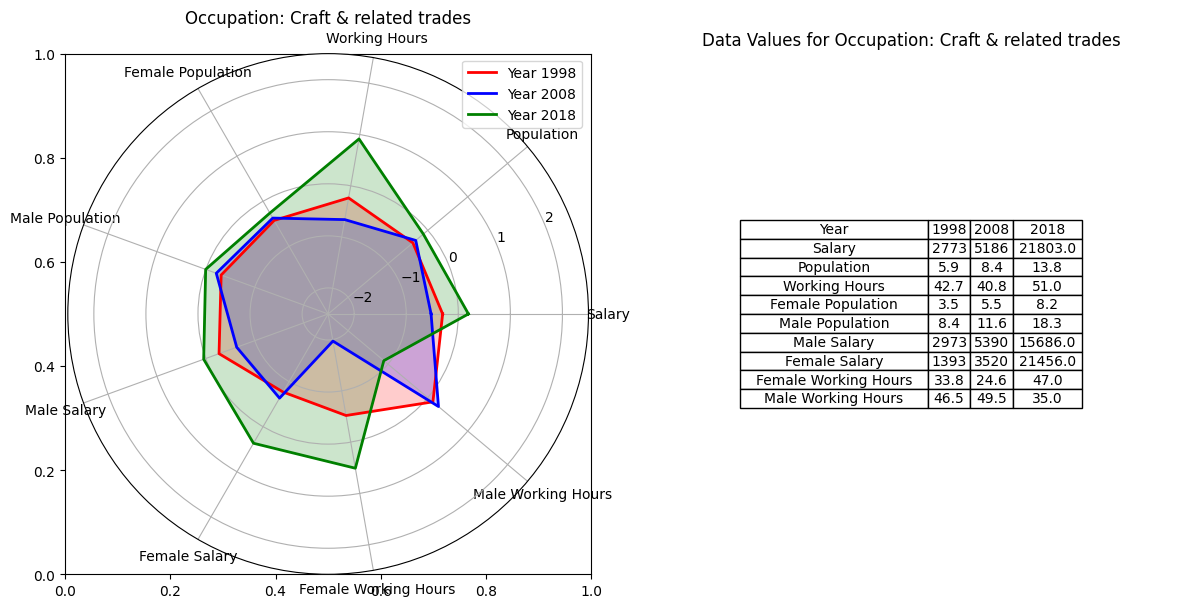

In [ ]:

labels = ["Salary", "Population", "Working Hours", "Female Population", "Male Population",
          "Male Salary", "Female Salary", "Female Working Hours", "Male Working Hours"]


# Convert to radians for radar plot
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1]})


ax = fig.add_subplot(121, polar=True)  # Ensure correct polar plot
for i, year in enumerate(years):
    values = [
        merged_df_scaled[f'total_ear_{year}'][Occupation],
        merged_df_scaled[f'total_pop_{year}'][Occupation],
        merged_df_scaled[f'total_wor_{year}'][Occupation],
        merged_df_scaled[f'female_pop_{year}'][Occupation],
        merged_df_scaled[f'male_pop_{year}'][Occupation],
        merged_df_scaled[f'male_ear_{year}'][Occupation],
        merged_df_scaled[f'female_ear_{year}'][Occupation],
        merged_df_scaled[f'female_wor_{year}'][Occupation],
        merged_df_scaled[f'male_wor_{year}'][Occupation]
    ]

    values += values[:1]  # Close shape
    angle_list = angles + angles[:1]

    ax.plot(angle_list, values, color=colors[i], linewidth=2, label=f'Year {year}')
    ax.fill(angle_list, values, color=colors[i], alpha=0.2)

ax.set_xticks(angles)
ax.set_xticklabels(labels)
ax.set_ylim(-2.5, 2.5)
ax.set_title(f"Occupation: {merged_df_scaled['Occupation'][Occupation]}")
ax.legend(loc="upper right")
ax.set_aspect('equal')  # Ensure circular radar plot

#  Data Table (Right Side)
ax2 = axs[1]
ax2.axis("off")  # Remove axes for a clean table look

# Prepare table data
table_data = []
for i, label in enumerate(labels):
    row = [label] + [
                     merged_df[f'female_pop_{year}'][Occupation] if "Female Population" in label else#this order seriously matters lol
                     merged_df[f'male_pop_{year}'][Occupation] if "Male Population" in label else
                     merged_df[f'male_ear_{year}'][Occupation] if "Male Salary" in label else
                     merged_df[f'female_ear_{year}'][Occupation] if "Female Salary" in label else
                     merged_df[f'female_wor_{year}'][Occupation] if "Female Working Hours" in label else
                     merged_df[f'male_wor_{year}'][Occupation] if "Male Working Hours" in label else 
                     merged_df[f'total_ear_{year}'][Occupation] if "Salary" in label else
                     merged_df[f'total_pop_{year}'][Occupation] if "Population" in label else
                     merged_df[f'total_wor_{year}'][Occupation] if "Working Hours" in label else 0
                     for year in years]
    table_data.append(row)

# Column headers
columns = ["Year"] + [str(year) for year in years]

# Create the table
table = ax2.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3])  # Adjust column width

ax2.set_title(f"Data Values for Occupation: {merged_df['Occupation'][Occupation]}", fontsize=12)

#  Adjust Layout and Show Plot
plt.tight_layout()
plt.show()